First, import all of the libraries necessary for the project.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load data into pandas DataFrames.

In [6]:
title_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [7]:
grossings_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [8]:
ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [9]:
budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [14]:
names_df = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

In [140]:
principals_df = pd.read_csv('zippedData/imdb.title.principals.csv.gz')

Check the heading of each dataframe created. This will be used to create a diagram keeping track of all columns in each DataFrame and how they can be joined.

In [10]:
title_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [11]:
grossings_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [12]:
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [13]:
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [15]:
names_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [141]:
principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


Check for missing values in each DataFrame.

In [17]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [18]:
title_df.shape

(146144, 6)

In [20]:
title_df.isna().sum()/len(title_df)

tconst             0.000000
primary_title      0.000000
original_title     0.000144
start_year         0.000000
runtime_minutes    0.217176
genres             0.037005
dtype: float64

run_time minutes is missing values for 21% total rows in title_df. May end up dropping that column.

In [21]:
grossings_df.isna().sum()/len(grossings_df)

title             0.000000
studio            0.001476
domestic_gross    0.008267
foreign_gross     0.398583
year              0.000000
dtype: float64

foreign_gross is missing values for 39% of rows in grossings_df. 

In [22]:
ratings_df.isna().sum()/len(ratings_df)

tconst           0.0
averagerating    0.0
numvotes         0.0
dtype: float64

No missing values in ratings_df.

In [23]:
budget_df.isna().sum()/len(budget_df)

id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64

No missing values in budget_df either.

In [24]:
names_df.isna().sum()/len(names_df)

nconst                0.000000
primary_name          0.000000
birth_year            0.863618
death_year            0.988819
primary_profession    0.084629
known_for_titles      0.049788
dtype: float64

Will likely end up dropping columns birth_year and death_year.

###  What about duplicate values?

In [82]:
title_df[title_df.duplicated(keep=False)]

,tconst,original_title,start_year,runtime_minutes,genres
primary_title,,,,,


In [84]:
budget_df[budget_df.duplicated(keep=False)].sort_values(by='movie')

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,


## How does movie genre affect domestic grossings?

Now, let's join some of the DataFrames to answer some questions about the data. First, I'd like to know how genres affect domestic grossings. To do this, we need to join title_df and grossings_df. Let's get some more information about these two DataFrames before joining.

In [25]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [27]:
title_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [26]:
grossings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [28]:
grossings_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Since there are far fewer rows in the grossings_df, we are going to use that as the left table in our join. 3,000 values added to a 146,000 row data set wouldn't be very helpful. To join the tables, we need to set the index on which we are going to join.

In [29]:
title_df.set_index('primary_title', inplace=True)
title_df.head()

,tconst,original_title,start_year,runtime_minutes,genres
primary_title,,,,,
Sunghursh,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
One Day Before the Rainy Season,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
The Other Side of the Wind,tt0069049,The Other Side of the Wind,2018,122.0,Drama
Sabse Bada Sukh,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
The Wandering Soap Opera,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [31]:
grossings_df.set_index('title', inplace=True)
grossings_df.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [32]:
title_grossings_df = grossings_df.join(title_df)
title_grossings_df.head()

,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres
'71,RAtt.,1300000.0,355000,2015,tt2614684,'71,2014.0,99.0,"Action,Drama,Thriller"
"1,000 Times Good Night",FM,53900.0,NaN,2014,tt2353767,Tusen ganger god natt,2013.0,117.0,"Drama,War"
10 Cloverfield Lane,Par.,72100000.0,38100000,2016,tt1179933,10 Cloverfield Lane,2016.0,103.0,"Drama,Horror,Mystery"
10 Years,Anch.,203000.0,NaN,2012,tt1715873,10 Years,2011.0,100.0,"Comedy,Drama,Romance"
1001 Grams,KL,11000.0,NaN,2015,tt3346824,1001 Gram,2014.0,93.0,Drama


We successfully created a new DataFrame. Let's look at some of the details of this new DataFrame.

In [34]:
title_grossings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4147 entries, '71 to xXx: The Return of Xander Cage
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   studio           4142 non-null   object 
 1   domestic_gross   4112 non-null   float64
 2   foreign_gross    2516 non-null   object 
 3   year             4147 non-null   int64  
 4   tconst           3366 non-null   object 
 5   original_title   3366 non-null   object 
 6   start_year       3366 non-null   float64
 7   runtime_minutes  3198 non-null   float64
 8   genres           3326 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 324.0+ KB


The purpose of creating this DataFrame was to see how genre affects domestic grossing. Therefore, we can drop any rows that are missing values for genres.

In [36]:
title_grossings_df.dropna(subset=['genres'], inplace=True)
title_grossings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3326 entries, Black Panther to White Lion
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   studio           3323 non-null   object 
 1   domestic_gross   3302 non-null   float64
 2   foreign_gross    2016 non-null   object 
 3   year             3326 non-null   int64  
 4   tconst           3326 non-null   object 
 5   original_title   3326 non-null   object 
 6   start_year       3326 non-null   float64
 7   runtime_minutes  3185 non-null   float64
 8   genres           3326 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 259.8+ KB


Now we need to sort the DataFrame in descending order by domestic_gross, then groupby the genre.

In [37]:
title_grossings_df.sort_values(by = ['domestic_gross'], ascending = False, inplace = True)
title_grossings_df.head()

,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres
Black Panther,BV,700100000.0,646900000,2018,tt1825683,Black Panther,2018.0,134.0,"Action,Adventure,Sci-Fi"
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
Jurassic World,Uni.,652300000.0,"1,019.4",2015,tt0369610,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi"
Star Wars: The Last Jedi,BV,620200000.0,712400000,2017,tt2527336,Star Wars: Episode VIII - The Last Jedi,2017.0,152.0,"Action,Adventure,Fantasy"
Incredibles 2,BV,608600000.0,634200000,2018,tt3606756,Incredibles 2,2018.0,118.0,"Action,Adventure,Animation"


In [52]:
top_genres_df = title_grossings_df.groupby(['genres']).mean().reset_index()

In [55]:
top_genres_df.sort_values(by = ['domestic_gross'], ascending = False, inplace = True)

In [56]:
top_genres_df.head()

,genres,domestic_gross,year,start_year,runtime_minutes
111,"Adventure,Drama,Sport",4.007000e+08,2013.000000,2010.0,93.000000
13,"Action,Adventure,Sci-Fi",2.345681e+08,2014.085106,2014.0,130.617021
110,"Adventure,Drama,Sci-Fi",2.082000e+08,2014.500000,2014.5,156.500000
243,"Documentary,Drama,Sport",2.067250e+08,2015.000000,2014.5,90.500000
305,"Fantasy,Romance",2.005215e+08,2012.500000,2011.0,107.000000


Now, let's create a seaborn bar chart to more easily distinguish the top genres.

Text(0.5, 1.0, 'Average Domestic Grossing by Movie Genre')

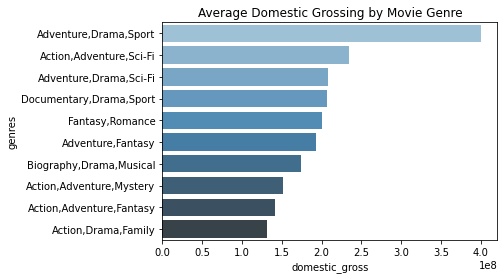

In [64]:
sns.barplot(x = 'domestic_gross', y = 'genres', data=top_genres_df.head(10), palette="Blues_d").set_title('Average Domestic Grossing by Movie Genre')


Based on these findings, the first recommendation to the studio is to focus on movies with a genre of Adventure, Drama and Sport.

## Which genres present the best return on investment?

Total grossings are not the only data relevant to a movie executive--how much was grossed compared to what was invested in making the movie is even more important. I am going to investigate the return on investment (ROI) for each movie, defined as grossing/budget.

In order to calculate the average ROI for each genre, we will need to join the budget_df and title_df.

In [65]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [66]:
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [69]:
budget_df.set_index('movie', inplace=True)

In [70]:
budget_df.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"
Dark Phoenix,3,"Jun 7, 2019","$350,000,000","$42,762,350","$149,762,350"
Avengers: Age of Ultron,4,"May 1, 2015","$330,600,000","$459,005,868","$1,403,013,963"
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017","$317,000,000","$620,181,382","$1,316,721,747"


In [67]:
title_df.head()

,tconst,original_title,start_year,runtime_minutes,genres
primary_title,,,,,
Sunghursh,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
One Day Before the Rainy Season,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
The Other Side of the Wind,tt0069049,The Other Side of the Wind,2018,122.0,Drama
Sabse Bada Sukh,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
The Wandering Soap Opera,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [71]:
title_budget_df = budget_df.join(title_df)
title_budget_df

,id,release_date,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
#Horror,16,"Nov 20, 2015","$1,500,000",$0,$0,tt3526286,#Horror,2015.0,101.0,"Crime,Drama,Horror"
(500) Days of Summer,55,"Jul 17, 2009","$7,500,000","$32,425,665","$34,439,060",NaN,NaN,NaN,NaN,NaN
10 Cloverfield Lane,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422",tt1179933,10 Cloverfield Lane,2016.0,103.0,"Drama,Horror,Mystery"
10 Days in a Madhouse,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616",tt3453052,10 Days in a Madhouse,2015.0,111.0,Drama
10 Things I Hate About You,63,"Mar 31, 1999","$13,000,000","$38,177,966","$60,413,950",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
mother!,59,"Sep 15, 2017","$30,000,000","$17,800,004","$42,531,076",NaN,NaN,NaN,NaN,NaN
xXx,98,"Aug 9, 2002","$70,000,000","$141,930,000","$267,200,000",NaN,NaN,NaN,NaN,NaN
xXx: Return of Xander Cage,15,"Jan 20, 2017","$85,000,000","$44,898,413","$345,033,359",tt1293847,xXx: Return of Xander Cage,2017.0,107.0,"Action,Adventure,Thriller"
Ã l\'intÃ©rieur,57,"Apr 15, 2008","$3,000,000",$0,"$895,932",NaN,NaN,NaN,NaN,NaN


In [76]:
title_budget_df.isna().sum()/len(title_budget_df)

id                   0.000000
release_date         0.000000
production_budget    0.000000
domestic_gross       0.000000
worldwide_gross      0.000000
tconst               0.471680
original_title       0.471818
start_year           0.471680
runtime_minutes      0.539122
genres               0.481651
dtype: float64

Since genres are missing for roughly half of our data and this is the variable we are investigating, let's drop rows with missing genre values.

In [77]:
title_budget_df.dropna(subset=['genres'], inplace=True)
title_budget_df

,id,release_date,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
#Horror,16,"Nov 20, 2015","$1,500,000",$0,$0,tt3526286,#Horror,2015.0,101.0,"Crime,Drama,Horror"
10 Cloverfield Lane,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422",tt1179933,10 Cloverfield Lane,2016.0,103.0,"Drama,Horror,Mystery"
10 Days in a Madhouse,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616",tt3453052,10 Days in a Madhouse,2015.0,111.0,Drama
12 Rounds,37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648",tt3517850,12 Rounds,2017.0,NaN,"Action,Drama,Romance"
12 Strong,64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378",tt1413492,12 Strong,2018.0,130.0,"Action,Drama,History"
...,...,...,...,...,...,...,...,...,...,...
Zoom,26,"Aug 11, 2006","$35,000,000","$11,989,328","$12,506,188",tt6117454,Zoom,2016.0,NaN,"Crime,Thriller"
Zoom,26,"Aug 11, 2006","$35,000,000","$11,989,328","$12,506,188",tt6667868,Zoom,2016.0,NaN,Horror
Zootopia,57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616",tt2948356,Zootopia,2016.0,108.0,"Adventure,Animation,Comedy"
Zulu,82,"Dec 31, 2013","$16,000,000",$0,"$1,844,228",tt2249221,Zulu,2013.0,110.0,"Crime,Drama,Thriller"


The next step is to create a new column called ROI, which will be calculated by subtracting production_budget from worldwide_gross, then dividing by production_budget. However, before we can do this, we must check the values we are using are stored as numbers.

In [87]:
title_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3743 entries, #Horror to xXx: Return of Xander Cage
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3743 non-null   int64  
 1   release_date       3743 non-null   object 
 2   production_budget  3743 non-null   object 
 3   domestic_gross     3743 non-null   object 
 4   worldwide_gross    3743 non-null   object 
 5   tconst             3743 non-null   object 
 6   original_title     3743 non-null   object 
 7   start_year         3743 non-null   float64
 8   runtime_minutes    3309 non-null   float64
 9   genres             3743 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 321.7+ KB


It looks like production_budget and worldwide_gross are being stored as objects. We must convert these values to float.

In [90]:
title_budget_df['production_budget'] = title_budget_df['production_budget'].str.replace(',','')
title_budget_df['production_budget'] = title_budget_df['production_budget'].str.replace('$','')
title_budget_df['production_budget']

#Horror                         1500000
10 Cloverfield Lane             5000000
10 Days in a Madhouse          12000000
12 Rounds                      20000000
12 Strong                      35000000
                                ...    
Zoom                           35000000
Zoom                           35000000
Zootopia                      150000000
Zulu                           16000000
xXx: Return of Xander Cage     85000000
Name: production_budget, Length: 3743, dtype: object

In [92]:
title_budget_df['production_budget'] = title_budget_df['production_budget'].astype(float)
title_budget_df['production_budget']

#Horror                         1500000.0
10 Cloverfield Lane             5000000.0
10 Days in a Madhouse          12000000.0
12 Rounds                      20000000.0
12 Strong                      35000000.0
                                 ...     
Zoom                           35000000.0
Zoom                           35000000.0
Zootopia                      150000000.0
Zulu                           16000000.0
xXx: Return of Xander Cage     85000000.0
Name: production_budget, Length: 3743, dtype: float64

In [93]:
title_budget_df['worldwide_gross'] = title_budget_df['worldwide_gross'].str.replace(',','')
title_budget_df['worldwide_gross'] = title_budget_df['worldwide_gross'].str.replace('$','')
title_budget_df['worldwide_gross']

#Horror                                0
10 Cloverfield Lane            108286422
10 Days in a Madhouse              14616
12 Rounds                       17306648
12 Strong                       71118378
                                 ...    
Zoom                            12506188
Zoom                            12506188
Zootopia                      1019429616
Zulu                             1844228
xXx: Return of Xander Cage     345033359
Name: worldwide_gross, Length: 3743, dtype: object

In [94]:
title_budget_df['worldwide_gross'] = title_budget_df['worldwide_gross'].astype(float)
title_budget_df['worldwide_gross']

#Horror                       0.000000e+00
10 Cloverfield Lane           1.082864e+08
10 Days in a Madhouse         1.461600e+04
12 Rounds                     1.730665e+07
12 Strong                     7.111838e+07
                                  ...     
Zoom                          1.250619e+07
Zoom                          1.250619e+07
Zootopia                      1.019430e+09
Zulu                          1.844228e+06
xXx: Return of Xander Cage    3.450334e+08
Name: worldwide_gross, Length: 3743, dtype: float64

In [99]:
title_budget_df['ROI'] = (title_budget_df['worldwide_gross'] - title_budget_df['production_budget']) / title_budget_df['production_budget']
title_budget_df['ROI']

#Horror                       -1.000000
10 Cloverfield Lane           20.657284
10 Days in a Madhouse         -0.998782
12 Rounds                     -0.134668
12 Strong                      1.031954
                                ...    
Zoom                          -0.642680
Zoom                          -0.642680
Zootopia                       5.796197
Zulu                          -0.884736
xXx: Return of Xander Cage     3.059216
Name: ROI, Length: 3743, dtype: float64

Next, sort the DataFrame by our new column, ROI.

In [101]:
title_budget_df.sort_values(by = ['ROI'], ascending = False, inplace=True)
title_budget_df

,id,release_date,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres,ROI
The Gallows,80,"Jul 10, 2015",100000.0,"$22,764,410",41656474.0,tt2309260,The Gallows,2015.0,81.0,"Horror,Mystery,Thriller",415.564740
Bambi,47,"Aug 13, 1942",858000.0,"$102,797,000",268000000.0,tt2668120,Bambi,2013.0,58.0,"Biography,Documentary",311.354312
Night of the Living Dead,77,"Oct 1, 1968",114000.0,"$12,087,064",30087064.0,tt3393372,Night of the Living Dead,2014.0,79.0,Horror,262.921614
Rocky,11,"Nov 21, 1976",1000000.0,"$117,235,147",225000000.0,tt3080284,Rocky,2013.0,136.0,"Action,Comedy,Drama",224.000000
Rocky,11,"Nov 21, 1976",1000000.0,"$117,235,147",225000000.0,tt9430578,Rocky,2019.0,NaN,"Action,Drama,Romance",224.000000
...,...,...,...,...,...,...,...,...,...,...,...
Crossroads,86,"Jun 23, 2015",500000.0,$0,0.0,tt2190231,Crossroads,2012.0,NaN,Comedy,-1.000000
Crossroads,86,"Jun 23, 2015",500000.0,$0,0.0,tt2219370,3 Yol,2013.0,116.0,"Drama,Mystery,War",-1.000000
Fugly,56,"Nov 7, 2014",4500000.0,$0,0.0,tt3683702,Fugly,2014.0,134.0,"Drama,Thriller",-1.000000
Freaky Deaky,94,"Dec 31, 2011",6000000.0,$0,0.0,tt0938305,Freaky Deaky,2012.0,90.0,"Comedy,Crime,Thriller",-1.000000


In [116]:
genres_ROI_df = title_budget_df.groupby(['genres']).mean().reset_index()
genres_ROI_df

,genres,id,production_budget,worldwide_gross,start_year,runtime_minutes,ROI
0,Action,47.565217,3.327935e+07,6.294143e+07,2014.543478,96.625000,1.273691
1,"Action,Adventure",62.000000,5.369533e+07,1.277316e+08,2016.333333,110.000000,2.952998
2,"Action,Adventure,Animation",45.941176,1.151471e+08,4.374047e+08,2014.058824,100.294118,3.100981
3,"Action,Adventure,Biography",25.400000,7.100000e+07,1.880822e+08,2015.600000,129.200000,1.366530
4,"Action,Adventure,Comedy",49.000000,8.051515e+07,2.975305e+08,2015.212121,108.125000,2.759817
...,...,...,...,...,...,...,...
340,"Sci-Fi,Thriller",62.500000,1.787750e+07,4.269099e+07,2016.125000,83.428571,2.607269
341,Sport,31.333333,3.066667e+07,2.802947e+07,2015.000000,114.000000,-0.350168
342,Thriller,49.123457,2.592334e+07,5.664000e+07,2014.308642,87.803571,2.362852
343,War,62.250000,4.000000e+07,1.134182e+08,2013.500000,123.500000,2.300131


In [117]:
genres_ROI_df.sort_values(by = ['ROI'], ascending = False, inplace=True)
genres_ROI_df

,genres,id,production_budget,worldwide_gross,start_year,runtime_minutes,ROI
133,"Animation,Family",54.500000,3244000.0,9.246274e+07,2015.50,58.000,61.138940
257,"Drama,Family,Fantasy",44.500000,48950000.0,3.990714e+08,2015.00,105.000,47.260224
62,"Action,History,War",53.333333,47500000.0,1.435970e+08,2012.00,NaN,29.851850
26,"Action,Comedy,Drama",40.000000,14737500.0,7.451666e+07,2013.25,104.125,29.045600
326,"Horror,Romance,Thriller",91.000000,3500000.0,9.512734e+07,2013.00,85.000,26.179241
...,...,...,...,...,...,...,...
236,"Documentary,Drama,Reality-TV",22.000000,1000000.0,0.000000e+00,2016.00,80.000,-1.000000
246,"Documentary,Horror",96.000000,700000.0,0.000000e+00,2011.00,52.000,-1.000000
321,"Horror,Musical",87.000000,500000.0,0.000000e+00,2016.00,97.000,-1.000000
207,"Comedy,Romance,Thriller",56.000000,1250000.0,0.000000e+00,2014.00,123.000,-1.000000


Based on average ROI by genre, animation/family films have the greatest return on investment.

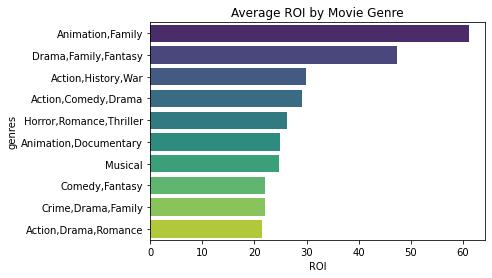

In [123]:
sns.barplot(x = 'ROI', y = 'genres', data=genres_ROI_df.head(10), palette="viridis").set_title('Average ROI by Movie Genre');


## What is the best month to release a movie?

We can also investigate a movie's grossings based on the time of year the movie is released. To do this, we will need to break out the release_date column in the budget_df. Since we already have ROI calculated in the title_budget_df, let's start with that DataFrame.

In [126]:
budget_df

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"
Dark Phoenix,3,"Jun 7, 2019","$350,000,000","$42,762,350","$149,762,350"
Avengers: Age of Ultron,4,"May 1, 2015","$330,600,000","$459,005,868","$1,403,013,963"
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017","$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
Red 11,78,"Dec 31, 2018","$7,000",$0,$0
Following,79,"Apr 2, 1999","$6,000","$48,482","$240,495"
Return to the Land of Wonders,80,"Jul 13, 2005","$5,000","$1,338","$1,338"


In [125]:
title_budget_df

,id,release_date,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres,ROI
The Gallows,80,"Jul 10, 2015",100000.0,"$22,764,410",41656474.0,tt2309260,The Gallows,2015.0,81.0,"Horror,Mystery,Thriller",415.564740
Bambi,47,"Aug 13, 1942",858000.0,"$102,797,000",268000000.0,tt2668120,Bambi,2013.0,58.0,"Biography,Documentary",311.354312
Night of the Living Dead,77,"Oct 1, 1968",114000.0,"$12,087,064",30087064.0,tt3393372,Night of the Living Dead,2014.0,79.0,Horror,262.921614
Rocky,11,"Nov 21, 1976",1000000.0,"$117,235,147",225000000.0,tt3080284,Rocky,2013.0,136.0,"Action,Comedy,Drama",224.000000
Rocky,11,"Nov 21, 1976",1000000.0,"$117,235,147",225000000.0,tt9430578,Rocky,2019.0,NaN,"Action,Drama,Romance",224.000000
...,...,...,...,...,...,...,...,...,...,...,...
Crossroads,86,"Jun 23, 2015",500000.0,$0,0.0,tt2190231,Crossroads,2012.0,NaN,Comedy,-1.000000
Crossroads,86,"Jun 23, 2015",500000.0,$0,0.0,tt2219370,3 Yol,2013.0,116.0,"Drama,Mystery,War",-1.000000
Fugly,56,"Nov 7, 2014",4500000.0,$0,0.0,tt3683702,Fugly,2014.0,134.0,"Drama,Thriller",-1.000000
Freaky Deaky,94,"Dec 31, 2011",6000000.0,$0,0.0,tt0938305,Freaky Deaky,2012.0,90.0,"Comedy,Crime,Thriller",-1.000000


Create a new column for the month of release date.

In [128]:
title_budget_df['release_month'] = title_budget_df['release_date'].map(lambda x: x.split()[0])
title_budget_df['release_month'] 

The Gallows                  Jul
Bambi                        Aug
Night of the Living Dead     Oct
Rocky                        Nov
Rocky                        Nov
                            ... 
Crossroads                   Jun
Crossroads                   Jun
Fugly                        Nov
Freaky Deaky                 Dec
My Girlfriend's Boyfriend    May
Name: release_month, Length: 3743, dtype: object

In [135]:
gross_by_month_df = title_budget_df.groupby(['release_month']).mean().reset_index()
gross_by_month_df

,release_month,id,production_budget,worldwide_gross,start_year,runtime_minutes,ROI
0,Apr,47.428986,2.623337e+07,7.121106e+07,2014.339130,94.450000,8.069869
1,Aug,54.423333,2.397393e+07,5.750559e+07,2014.120000,94.958801,2.797944
2,Dec,51.526316,2.860904e+07,8.856920e+07,2014.419028,99.415274,1.808632
3,Feb,52.072519,2.942628e+07,8.163216e+07,2014.583969,96.206140,4.898987
4,Jan,53.542735,2.254105e+07,6.057564e+07,2014.350427,98.443396,4.141290
5,Jul,52.265873,3.891454e+07,1.286495e+08,2013.992063,98.652542,4.380198
6,Jun,54.016129,4.432292e+07,1.463642e+08,2014.183871,94.820513,1.706515
7,Mar,48.184290,4.546345e+07,1.306015e+08,2014.353474,93.328767,1.353688
8,May,48.754032,4.610681e+07,1.351299e+08,2014.169355,100.572072,2.042555
9,Nov,45.849650,4.465263e+07,1.446476e+08,2014.321678,101.637405,4.428626


In [136]:
gross_by_month_df.sort_values(by = ['worldwide_gross'], ascending = False, inplace=True)
gross_by_month_df

,release_month,id,production_budget,worldwide_gross,start_year,runtime_minutes,ROI
6,Jun,54.016129,4.432292e+07,1.463642e+08,2014.183871,94.820513,1.706515
9,Nov,45.849650,4.465263e+07,1.446476e+08,2014.321678,101.637405,4.428626
8,May,48.754032,4.610681e+07,1.351299e+08,2014.169355,100.572072,2.042555
7,Mar,48.184290,4.546345e+07,1.306015e+08,2014.353474,93.328767,1.353688
5,Jul,52.265873,3.891454e+07,1.286495e+08,2013.992063,98.652542,4.380198
2,Dec,51.526316,2.860904e+07,8.856920e+07,2014.419028,99.415274,1.808632
3,Feb,52.072519,2.942628e+07,8.163216e+07,2014.583969,96.206140,4.898987
0,Apr,47.428986,2.623337e+07,7.121106e+07,2014.339130,94.450000,8.069869
4,Jan,53.542735,2.254105e+07,6.057564e+07,2014.350427,98.443396,4.141290
1,Aug,54.423333,2.397393e+07,5.750559e+07,2014.120000,94.958801,2.797944


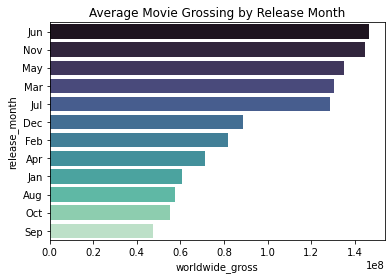

In [139]:
sns.barplot(x = 'worldwide_gross', y = 'release_month', data=gross_by_month_df, palette="mako").set_title('Average Movie Grossing by Release Month');

It looks like average worldwide grossing is highest for movies released in June, with November not far behind.

## What directors have the highest grossing movies?

In order to have a successful movie studio, the executives should consider hiring the most successful movie directors. We will need to combine several data frames to get the names of the directors with the highest grossing movies-- title_df, names_df, principals_df and gross_df.

In [147]:
names_df.set_index('nconst', inplace=True)
names_df

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...
nm9990381,Susan Grobes,NaN,NaN,actress,NaN
nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"


In [160]:
principals_df.drop(columns=['ordering'], inplace = True)

In [162]:
names_grossings_df = pd.merge(names_df, principals_df, left_on=['nconst'], right_on=['nconst'], how ='left')
names_grossings_df

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,tconst,category,job,characters
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,producer,producer,NaN
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt0433397,composer,NaN,NaN
2,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt1681372,composer,NaN,NaN
3,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2387710,composer,NaN,NaN
4,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2281215,composer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1030265,nm9990381,Susan Grobes,NaN,NaN,actress,NaN,tt6527982,actress,NaN,"[""Cheryl"",""Gypsy""]"
1030266,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130",tt8737130,actress,NaN,NaN
1030267,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610",tt8734436,actress,NaN,"[""Anna""]"
1030268,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN,tt8739240,producer,producer,NaN


In [161]:
names_grossings_df = names_df.join(principals_df.set_index('nconst'), how='left')
names_grossings_df

,primary_name,birth_year,death_year,primary_profession,known_for_titles,tconst,category,job,characters
nconst,,,,,,,,,
nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382",tt1626811,self,NaN,"[""Herself - Interviewee""]"
nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382",tt0858500,actress,NaN,"[""May""]"
nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382",tt1368858,actress,NaN,"[""Anne-Marie""]"
nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382",tt2053352,archive_footage,NaN,"[""Herself""]"
nm0000003,Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956",tt2004245,archive_footage,NaN,"[""Herself""]"
...,...,...,...,...,...,...,...,...,...
nm9993494,Amjad Ali,NaN,NaN,writer,tt7722258,tt7722258,writer,screenplay and dialogue,NaN
nm9993573,Lakisha Louissaint,NaN,NaN,"director,writer,producer",tt10299418,tt10299418,director,NaN,NaN
nm9993616,Ryan Mac Lennan,NaN,NaN,actor,tt4844148,tt4844148,actor,NaN,"[""Mick Owen""]"


In [163]:
directors_df = names_grossings_df.loc[names_grossings_df['category']=='director']
directors_df

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,tconst,category,job,characters
12,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2057445,director,NaN,NaN
13,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt1592569,director,NaN,NaN
14,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2590280,director,NaN,NaN
15,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt8421806,director,NaN,NaN
48,nm0064023,Bryan Beasley,NaN,NaN,"director,producer,writer","tt3501180,tt1485100,tt1358897,tt1387162",tt3501180,director,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1030239,nm9971456,Zheng Wei,NaN,NaN,director,NaN,tt8697720,director,NaN,NaN
1030247,nm9980896,Rama Narayanan,NaN,NaN,"director,writer","tt10127906,tt8715016,tt8919136,tt8929818",tt8715016,director,NaN,NaN
1030248,nm9980896,Rama Narayanan,NaN,NaN,"director,writer","tt10127906,tt8715016,tt8919136,tt8929818",tt8919136,director,NaN,NaN
1030249,nm9981679,Samir Eshra,NaN,NaN,"director,writer,cinematographer",NaN,tt8717234,director,NaN,NaN


Now that we have a subset of directors, need to merge with grossings info to get top grossing directors.
First we need to merge with title_df in order to get to the gross_df.

In [164]:
directors_gross = directors_df.merge(title_df, how = 'left', left_on = 'tconst', right_on = 'tconst')
directors_gross

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,tconst,category,job,characters,primary_title,original_title,start_year,runtime_minutes,genres
0,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2057445,director,NaN,NaN,No Other Woman,No Other Woman,2011,101.0,"Drama,Romance,Thriller"
1,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt1592569,director,NaN,NaN,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance"
2,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2590280,director,NaN,NaN,One More Try,One More Try,2012,100.0,Drama
3,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt8421806,director,NaN,NaN,Kasal,Kasal,2018,115.0,NaN
4,nm0064023,Bryan Beasley,NaN,NaN,"director,producer,writer","tt3501180,tt1485100,tt1358897,tt1387162",tt3501180,director,NaN,NaN,The Quiet Philanthropist: The Edith Gaylord Story,The Quiet Philanthropist: The Edith Gaylord Story,2014,45.0,"Documentary,History"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146388,nm9971456,Zheng Wei,NaN,NaN,director,NaN,tt8697720,director,NaN,NaN,The Old Road,The Old Road,2013,NaN,Family
146389,nm9980896,Rama Narayanan,NaN,NaN,"director,writer","tt10127906,tt8715016,tt8919136,tt8929818",tt8715016,director,NaN,NaN,Chain Jayapal,Chain Jayapal,2018,NaN,NaN
146390,nm9980896,Rama Narayanan,NaN,NaN,"director,writer","tt10127906,tt8715016,tt8919136,tt8929818",tt8919136,director,NaN,NaN,Arya Suriya,Arya Suriya,2013,130.0,Drama
146391,nm9981679,Samir Eshra,NaN,NaN,"director,writer,cinematographer",NaN,tt8717234,director,NaN,NaN,The Shadow Lawyers,The Shadow Lawyers,2018,NaN,Documentary


In [165]:
directors_gross = directors_gross.merge(grossings_df, how = 'left', left_on ='primary_title', right_on = 'title')
directors_gross

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,tconst,category,job,characters,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2057445,director,NaN,NaN,No Other Woman,No Other Woman,2011,101.0,"Drama,Romance,Thriller",NaN,NaN,NaN,NaN
1,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt1592569,director,NaN,NaN,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",NaN,NaN,NaN,NaN
2,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2590280,director,NaN,NaN,One More Try,One More Try,2012,100.0,Drama,NaN,NaN,NaN,NaN
3,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt8421806,director,NaN,NaN,Kasal,Kasal,2018,115.0,NaN,NaN,NaN,NaN,NaN
4,nm0064023,Bryan Beasley,NaN,NaN,"director,producer,writer","tt3501180,tt1485100,tt1358897,tt1387162",tt3501180,director,NaN,NaN,The Quiet Philanthropist: The Edith Gaylord Story,The Quiet Philanthropist: The Edith Gaylord Story,2014,45.0,"Documentary,History",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146390,nm9971456,Zheng Wei,NaN,NaN,director,NaN,tt8697720,director,NaN,NaN,The Old Road,The Old Road,2013,NaN,Family,NaN,NaN,NaN,NaN
146391,nm9980896,Rama Narayanan,NaN,NaN,"director,writer","tt10127906,tt8715016,tt8919136,tt8929818",tt8715016,director,NaN,NaN,Chain Jayapal,Chain Jayapal,2018,NaN,NaN,NaN,NaN,NaN,NaN
146392,nm9980896,Rama Narayanan,NaN,NaN,"director,writer","tt10127906,tt8715016,tt8919136,tt8929818",tt8919136,director,NaN,NaN,Arya Suriya,Arya Suriya,2013,130.0,Drama,NaN,NaN,NaN,NaN
146393,nm9981679,Samir Eshra,NaN,NaN,"director,writer,cinematographer",NaN,tt8717234,director,NaN,NaN,The Shadow Lawyers,The Shadow Lawyers,2018,NaN,Documentary,NaN,NaN,NaN,NaN


In [166]:
directors_gross.isna().sum()

nconst                     0
primary_name               0
birth_year            116660
death_year            145546
primary_profession       587
known_for_titles        4204
tconst                     0
category                   0
job                   138891
characters            146395
primary_title              0
original_title             0
start_year                 0
runtime_minutes        28913
genres                  3295
studio                142890
domestic_gross        142913
foreign_gross         144239
year                  142886
dtype: int64

Since we are focused on domestic_gross, we should again drop any rows that have missing values for domestic_gross.

In [167]:
directors_gross.dropna(subset=['domestic_gross'], inplace=True)
directors_gross

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,tconst,category,job,characters,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
38,nm0099841,Gilles Bourdos,1963.0,NaN,"writer,director","tt5539466,tt2150332,tt0940580,tt0339204",tt2150332,director,NaN,NaN,Renoir,Renoir,2012,111.0,"Biography,Drama,History",Gold.,2300000.0,NaN,2013.0
40,nm0101047,David Bowers,NaN,NaN,"animation_department,director,writer","tt2023453,tt1650043,tt0375568,tt0424095",tt2023453,director,NaN,NaN,Diary of a Wimpy Kid: Dog Days,Diary of a Wimpy Kid: Dog Days,2012,94.0,"Comedy,Family",Fox,49000000.0,28100000,2012.0
41,nm0101047,David Bowers,NaN,NaN,"animation_department,director,writer","tt2023453,tt1650043,tt0375568,tt0424095",tt1650043,director,NaN,NaN,Diary of a Wimpy Kid: Rodrick Rules,Diary of a Wimpy Kid: Rodrick Rules,2011,99.0,"Comedy,Family",Fox,52700000.0,19700000,2011.0
42,nm0101047,David Bowers,NaN,NaN,"animation_department,director,writer","tt2023453,tt1650043,tt0375568,tt0424095",tt6003368,director,NaN,NaN,Diary of a Wimpy Kid: The Long Haul,Diary of a Wimpy Kid: The Long Haul,2017,91.0,"Comedy,Family",Fox,20700000.0,19400000,2017.0
97,nm0161834,Derek Cianfrance,1974.0,NaN,"director,writer,cinematographer","tt0176573,tt1120985,tt1817273,tt2547584",tt1817273,director,NaN,NaN,The Place Beyond the Pines,The Place Beyond the Pines,2012,140.0,"Crime,Drama,Thriller",Focus,21400000.0,14100000,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145671,nm6576432,Baimei Yu,NaN,NaN,"director,writer,actor","tt5297654,tt7131870,tt1353771,tt3667798",tt3667798,director,NaN,NaN,The Breakup Guru,Fen shou da shi,2014,114.0,Comedy,CL,209000.0,NaN,2014.0
146003,nm8390573,Shoaib Khan,1979.0,NaN,"director,actor,art_director","tt6003158,tt8671762",tt8671762,director,NaN,NaN,Jackpot,Jackpot,2018,150.0,"Comedy,Romance",DR,800.0,1100000,2014.0
146052,nm8820099,Travis Williams,NaN,NaN,director,tt6598256,tt6598256,director,collaborating director,NaN,No Strings Attached,No Strings Attached,2017,73.0,"Comedy,Drama,Romance",Par.,70700000.0,78600000,2011.0
146072,nm8915275,Oriane Playner,NaN,NaN,"writer,director,art_director","tt6765756,tt8999866",tt6765756,director,co-director,NaN,Foxtrot,Foxtrot,2017,113.0,Mystery,SPC,619000.0,NaN,2018.0


In [168]:
directors_gross.sort_values(by='domestic_gross', ascending=False, inplace=True)
directors_gross

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,tconst,category,job,characters,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
86739,nm3363032,Ryan Coogler,1986.0,NaN,"director,writer,producer","tt1825683,tt6343314,tt2334649,tt3076658",tt1825683,director,NaN,NaN,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",BV,700100000.0,646900000,2018.0
15469,nm0751577,Anthony Russo,1970.0,NaN,"producer,director,writer","tt1843866,tt4154756,tt3498820,tt4154796",tt4154756,director,NaN,NaN,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",BV,678800000.0,"1,369.5",2018.0
976,nm0751648,Joe Russo,1971.0,NaN,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820",tt4154756,director,NaN,NaN,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",BV,678800000.0,"1,369.5",2018.0
25247,nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",tt0369610,director,NaN,NaN,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Uni.,652300000.0,"1,019.4",2015.0
2093,nm0426059,Rian Johnson,1973.0,NaN,"director,writer,editor","tt1276104,tt2527336,tt0393109,tt0844286",tt2527336,director,NaN,NaN,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",BV,620200000.0,712400000,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36508,nm2165066,Carles Torrens,1984.0,NaN,"director,writer,producer","tt1294984,tt2821104,tt1183374,tt0881902",tt1757742,director,NaN,NaN,Apartment 143,Emergo,2011,80.0,"Horror,Thriller",Magn.,400.0,426000,2012.0
4254,nm0192984,Paul Currie,NaN,NaN,"producer,director,assistant_director","tt5813366,tt1131724,tt2119532,tt0316353",tt1131724,director,NaN,NaN,2:22,2:22,2017,98.0,Thriller,Magn.,400.0,NaN,2017.0
97080,nm3569165,Lila Avilés,NaN,NaN,"actor,director,writer",tt8331988,tt8331988,director,NaN,NaN,The Chambermaid,La camarista,2018,102.0,Drama,FM,300.0,NaN,2015.0
19383,nm0402493,Jeffrey G. Hunt,1973.0,NaN,"camera_department,director,assistant_director","tt0247082,tt4796122,tt0395843,tt3514324",tt4796122,director,NaN,NaN,Satanic,Satanic,2016,85.0,Horror,Magn.,300.0,NaN,2016.0


In [175]:
sorted_directors_df = directors_gross.groupby(['primary_name']).sum()
sorted_directors_df

,birth_year,death_year,start_year,runtime_minutes,domestic_gross,year
primary_name,,,,,,
A.R. Mavero,0.0,0.0,2018,0.0,120000.0,2016.0
A.R. Murugadoss,0.0,0.0,2016,137.0,219000.0,2016.0
Aanand L. Rai,0.0,0.0,2015,128.0,3000000.0,2015.0
Aaron Agrasanchez,0.0,0.0,2015,85.0,31400000.0,2018.0
Aaron Canter,0.0,0.0,2017,110.0,151000.0,2017.0
...,...,...,...,...,...,...
Zsófia Szilágyi,0.0,0.0,2018,99.0,13800000.0,2011.0
Ágnes Hranitzky,1945.0,0.0,2011,155.0,56400.0,2012.0
Álex de la Iglesia,1965.0,0.0,2010,107.0,40500.0,2011.0


In [179]:
sorted_directors_df.sort_values(by='domestic_gross', ascending=False, inplace=True)
sorted_directors_df

,birth_year,death_year,start_year,runtime_minutes,domestic_gross,year
primary_name,,,,,,
Joe Russo,7884.0,0.0,8068,432.0,1.346711e+09,8058.0
Anthony Russo,7880.0,0.0,8068,432.0,1.346711e+09,8058.0
Francis Lawrence,9855.0,0.0,10071,666.0,1.149100e+09,10071.0
Christopher Nolan,7880.0,0.0,8053,587.0,1.116700e+09,8053.0
Chris Renaud,0.0,0.0,6039,280.0,9.880000e+08,6039.0
...,...,...,...,...,...,...
Franck Khalfoun,0.0,0.0,2017,85.0,7.000000e+02,2017.0
Carles Torrens,1984.0,0.0,2011,80.0,4.000000e+02,2012.0
Paul Currie,0.0,0.0,2017,98.0,4.000000e+02,2017.0


In [182]:
sorted_directors_df.reset_index(inplace=True)

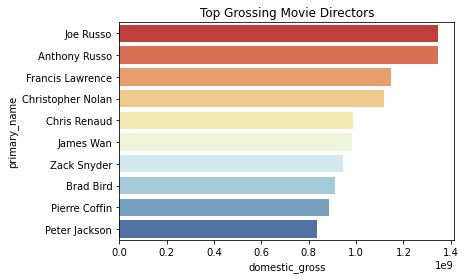

In [184]:
sns.barplot(x = 'domestic_gross', y = 'primary_name', data=sorted_directors_df.head(10), palette="RdYlBu").set_title('Top Grossing Movie Directors');

If Microsoft wants to 